In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})

In [9]:
import datetime
import os
import numpy as np
import math

import waveform
import sample
import model_utils
import dataset

2022-07-10 15:22:39.533717: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-10 15:22:39.533781: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
import wispy.callbacks

In [11]:
# from model_utils import PoisonPillCallback

In [12]:
import pandas as pd

In [13]:
import tensorflow as tf

In [14]:
import pycbc.pnutils

In [15]:
import lalsimulation as lalsim

In [16]:
import sklearn.preprocessing

In [17]:
plt.rcParams.update({'font.size':16})

# generate waveform data

In [89]:
def gen_waveform_set(approximant, train_test_val, n_samples, nproc=1, mass_ratio_low=1, mass_ratio_high=8, return_data='hp_hc'):
    assert train_test_val in ['train', 'val']
    
    # approximant="IMRPhenomXHM"
    # approximant="IMRPhenomXPHM"
    # approximant="SEOBNRv4PHM"
    # approximant="IMRPhenomXAS"
    # approximant="SEOBNRv4_opt"
    # approximant="SEOBNRv4P"
    # approximant="SEOBNRv4P"
    # approximant="IMRPhenomXP"
    # approximant="IMRPhenomD"
    # approximant="IMRPhenomHM"

    # uniform spacing throughout
    t1 = -2000
    # t1 = -500
    # t1 = -200
    # t1 = -50
    
    # t1 = -50
    t2 = 70
    # t1 = -10
    # t2 = 20
    dt = 0.25
    new_times_M = np.arange(t1, t2, dt)

    t_idxs = np.arange(len(new_times_M))
    # t_training_idxs = None
    # t_validation_idxs = None
    if train_test_val == "train":
        t_idxs_sample = t_idxs[::2]
    elif train_test_val == "val":
        # t_idxs_sample = t_idxs[1::2]
        t_idxs_sample = t_idxs[::2]

    total_mass=100
    distance_mpc=1
    delta_t=1/4096
    f_lower=10
    
    mass_ratios = np.zeros(n_samples) + 8
    spin1xs = np.zeros(n_samples) + 0.99
    spin1ys = np.zeros(n_samples)
    spin1zs = np.zeros(n_samples)
    spin2xs = np.zeros(n_samples)
    spin2ys = np.zeros(n_samples)
    spin2zs = np.zeros(n_samples)
    coa_phases = np.zeros(n_samples)+np.pi/3
    # inclinations = np.random.uniform(0, np.pi, n_samples)
    inclinations = np.linspace(0, np.pi, n_samples)
    

    starttime = datetime.datetime.now()

    times, thetas, hps, hcs = waveform.generate_waveforms_mp(
        new_times_M,
        mass_ratios,
        spin1xs,
        spin1ys,
        spin1zs,
        spin2xs,
        spin2ys,
        spin2zs,
        coa_phases,
        inclinations,
        time_idxs=t_idxs_sample,
        total_mass=total_mass,
        approximant=approximant,
        distance_mpc=distance_mpc,
        delta_t=delta_t,
        f_lower=f_lower,
        nproc=nproc,
        return_data=return_data,
    )

    endtime = datetime.datetime.now()
    duration = endtime - starttime
    print(f"The time cost: {duration}")
    

    # return times[t_index][:,np.newaxis], thetas, hps[:,t_index][:,np.newaxis], hcs[:,t_index][:,np.newaxis]
    return times, thetas, hps, hcs

In [90]:
parameter_names = ['mass_ratio', 'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z', 'coa_phase', 'inclination']

In [96]:

n_samples=20

# return_data='amp_phi'
return_data='hp_hc'

# t_index = 100

In [97]:
approxs=[
    # 'IMRPhenomD',
    # 'IMRPhenomXAS',
    # 'SEOBNRv4_opt',
    'IMRPhenomXP',
    'IMRPhenomPv3', 
    'SEOBNRv3_opt', 
    'SEOBNRv4P',
]
wfs={}
for approx in approxs:
    print(approx)
    wfs[approx]={}
    wfs[approx]['times'], wfs[approx]['thetas'], wfs[approx]['hps'], wfs[approx]['hcs'] = gen_waveform_set(approximant=approx, train_test_val='train', n_samples=n_samples, nproc=4, return_data=return_data)

IMRPhenomXP
The time cost: 0:00:00.475086
IMRPhenomPv3
The time cost: 0:00:00.678720
SEOBNRv3_opt
The time cost: 0:00:05.797708
SEOBNRv4P
The time cost: 0:00:14.219964


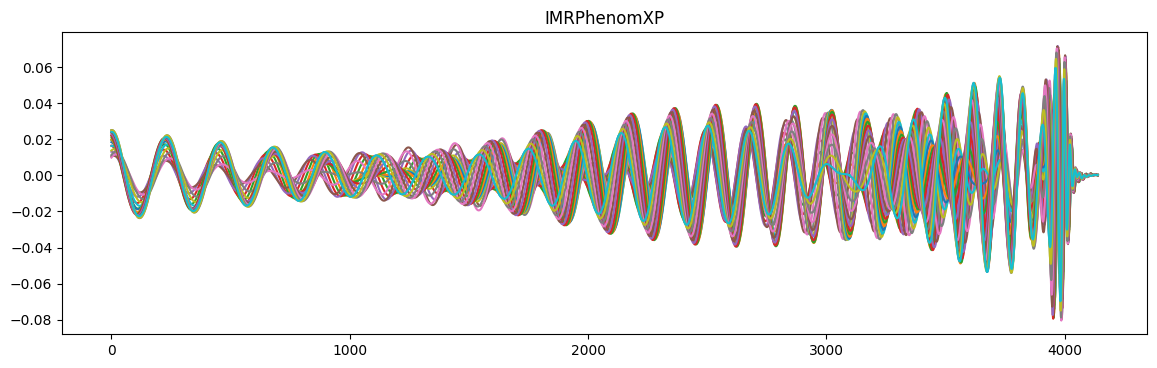

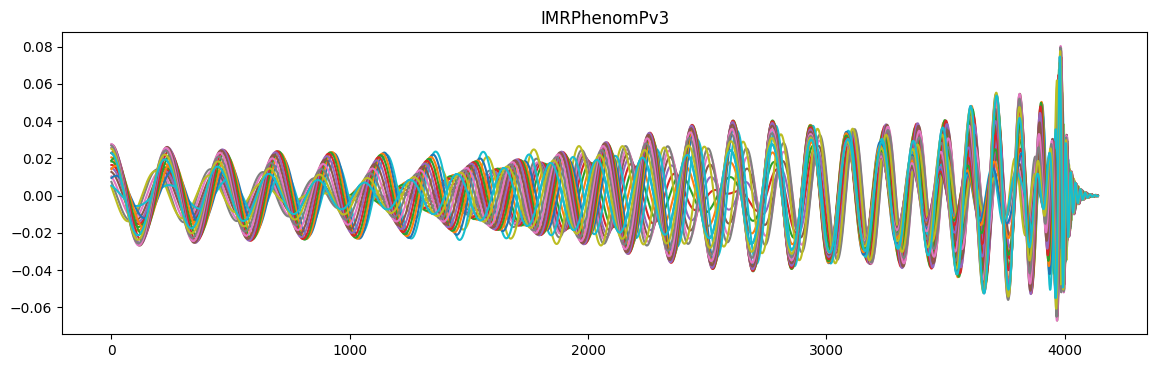

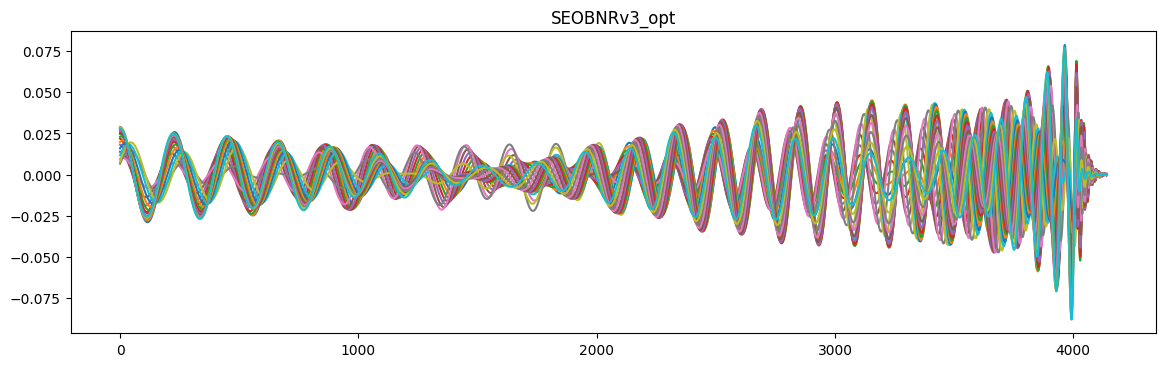

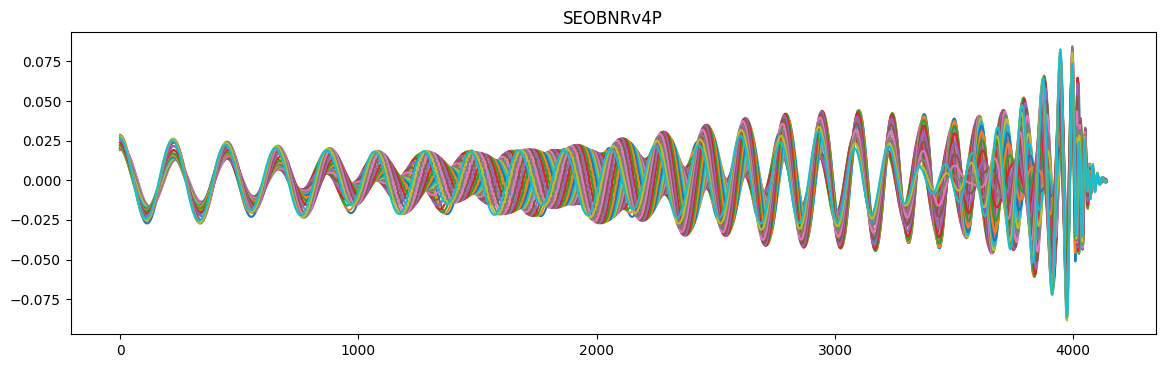

In [98]:
for approx in approxs:
    plt.figure(figsize=(14, 4), dpi=100)
    for hp in wfs[approx]['hps']:
        plt.plot(hp)
    plt.title(approx)

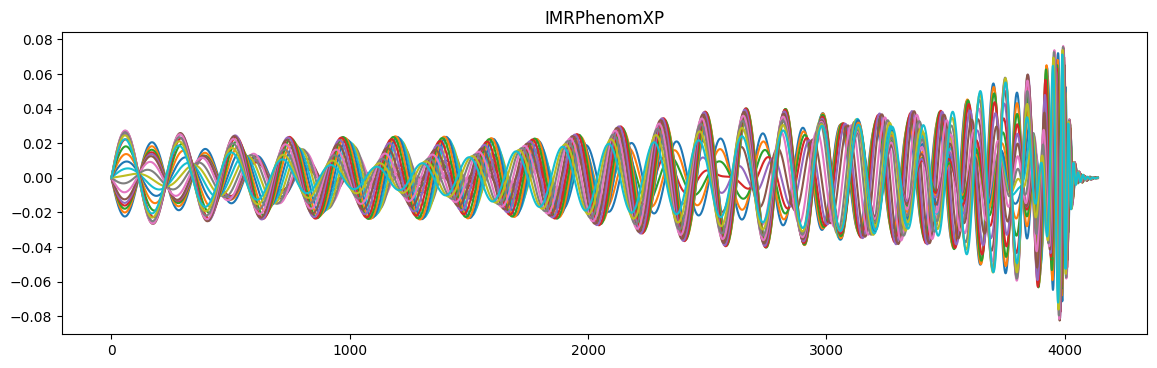

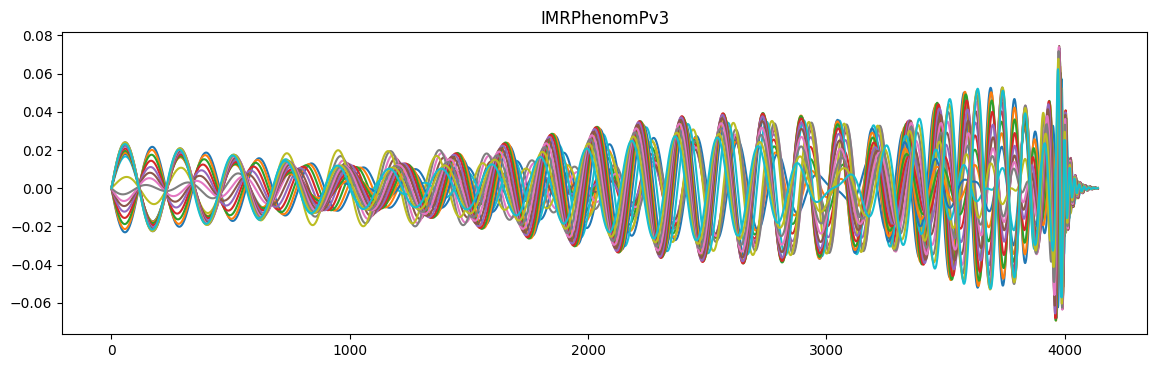

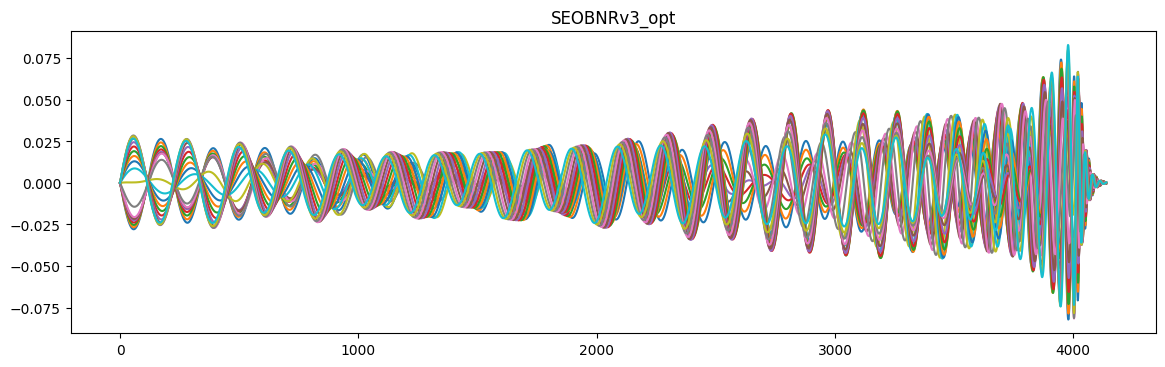

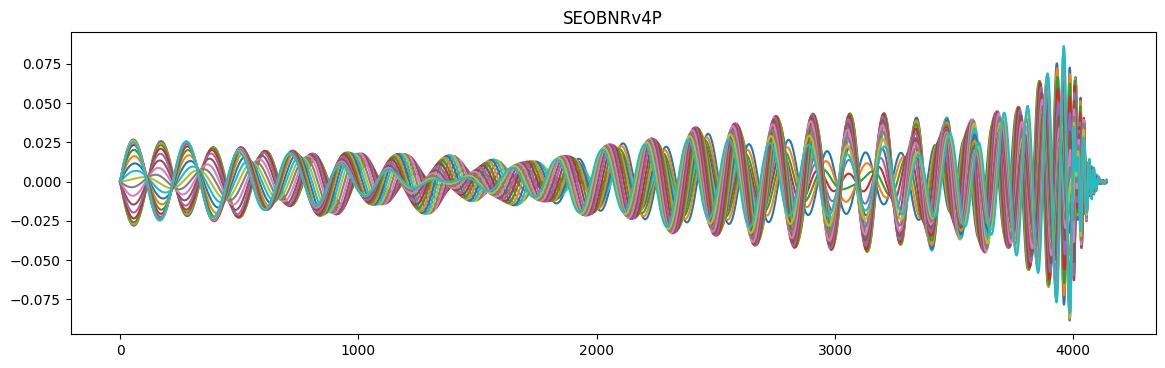

In [99]:
for approx in approxs:
    plt.figure(figsize=(14, 4), dpi=100)
    for hc in wfs[approx]['hcs']:
        plt.plot(hc)
    plt.title(approx)